# Gapminder Data Analysis

The dataset used for this notebook was obtained from [gapminder.org](http://www.gapminder.org/data/) with the following information:

* Aged 15+ Employment Rate (%)
* Life Expectancy (years)
* GDP/capita (US$, inflation adjusted)
* Primary school completion (% of boys)
* Primary school completion (% of girls)

###### Summary 
* 1) Import and clean data
    * import data 
    * worldwide data
    * canadian data
   
* 2) Explore Data
    * summary statistics canada vs worldwide
        * employment rate 
        * life expectancy 
        * GDP
        * male school completion
        * female school completion 
    * correlations canada vs worldwide
        * life expectancy and GDP 
        * gender and school completion 
    * compare canada and worldwide data 
        * standardizing the data point
        * time series graphs
  
* 3) Conclusions

# 1) Import and Clean Data

###### Import Data

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

# Read worldwide data into Pandas DataFrames with index column as country 
employment = pd.read_csv('employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv('female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv('male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col='Country')
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')

# Data specific to index Canada:
# Use .loc to look up values in pd series by index and .iloc for position 
employment_ca = employment.loc['Canada'].round(2)
# Drop NAN from the male/female data series 
female_completion_ca = female_completion.loc['Canada'].dropna().round(2)
male_completion_ca = male_completion.loc['Canada'].dropna().round(2)
life_expectancy_ca = life_expectancy.loc['Canada'].round(2)
gdp_ca = gdp.loc['Canada'].round(2)

Populating the interactive namespace from numpy and matplotlib


#### Worldwide Data

In [2]:
# Print all countries avaliable in worldwide data 
print employment.index.values
print "Number of countries in dataset: ",len(employment.index.values)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Rep.' 'Congo, Dem. Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominican Rep.' 'Timor-Leste'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Kyrgyzstan

From this data analysis, we will be using data from 178 countries to represent "worldwide" trends which should be sufficent.

#### Canadian Data

When we were cleaning the data, we removed all the NAN values from male and female school completion rates which left us with only 4 data points for Canada. All floating point data types.

In [3]:
print employment_ca.index.values
print "Employment data points for Canada:", len(employment_ca.index.values)
employment_ca.dtype

['1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007']
Employment data points for Canada: 17


dtype('float64')

In [4]:
print female_completion_ca.values
female_completion_ca.dtype

[ 94.94  96.47  97.74  95.51]


dtype('float64')

In [5]:
print male_completion_ca.values
male_completion_ca.dtype

[ 94.18  95.54  97.33  95.98]


dtype('float64')

In [6]:
print life_expectancy_ca.values
print "Life expectancy data points for Canada:", len(life_expectancy_ca.index.values)
life_expectancy_ca.dtype

[ 39.    39.    39.    39.    39.01  39.01  39.01  39.01  39.01  39.01
  39.01  39.02  39.02  39.02  39.02  39.02  39.02  39.03  39.03  39.03
  39.03  39.03  39.03  39.03  39.04  39.04  39.04  39.04  39.04  39.04
  39.04  39.05  39.17  39.3   39.43  39.55  39.68  39.81  39.94  40.06
  40.19  40.32  40.39  40.47  40.54  40.61  40.69  40.76  40.84  40.91
  40.99  41.06  41.11  41.17  41.22  41.27  41.33  41.38  41.43  41.49
  41.54  41.6   41.69  41.79  41.88  41.98  42.08  42.17  42.27  42.36
  42.46  42.56  42.77  42.99  43.21  43.43  43.64  43.86  44.08  44.3
  44.51  44.73  44.77  44.82  44.86  44.91  44.95  45.    45.04  45.09
  45.13  45.17  45.52  45.87  46.21  46.56  46.9   47.25  47.6   47.94
  48.29  48.63  49.02  49.41  49.8   50.18  50.57  50.96  51.35  51.74
  52.12  52.51  52.96  53.41  53.86  54.31  54.77  55.22  47.17  56.12
  56.57  57.02  57.02  57.02  58.83  59.31  57.99  58.68  58.57  57.97
  58.95  60.36  61.43  62.36  62.77  62.49  62.72  61.35  63.31  63.74
  64.01

dtype('float64')

In [7]:
print gdp_ca.values
print "GDP data points for Canada:", len(gdp_ca.index.values)
gdp_ca.dtype

[  9374.88   9479.82   9967.37  10290.36  10774.65  11283.61  11804.67
  11932.17  12362.93  12837.47  12986.31  13320.19  13823.29  14537.59
  14806.31  14793.71  15358.41  15703.9   16161.77  16610.17  16751.34
  17124.39  16435.47  16713.7   17516.24  18183.73  18437.71  18971.41
  19659.67  19817.99  19561.88  18893.8   18826.66  19057.23  19781.71
  20169.54  20276.45  20911.11  21580.32  22586.44  23559.5   23738.9
  24214.93  24425.88  24936.83  25437.65  25943.74  26229.74  26101.76
  25069.87  25575.22  25933.29]
GDP data points for Canada: 52


dtype('float64')

# Explore Data 

#### Summary Statistics Canada vs Worldwide

In [18]:
def sum_stats(index):
    sum_mean = index.mean()
    sum_std = index.std()
    sum_max = index.max()
    sum_sum = index.sum()
    print "Mean:", sum_mean
    print "Standard deviation:", sum_std
    print "Max:", sum_max
    print "Sum:", sum_sum

# Canada 
print "Employment CA:", sum_stats(employment_ca)
print "Female school completion rates CA:", sum_stats(female_completion_ca)
print "Male school completion rates CA:", sum_stats(male_completion_ca)
print "Life expectancy CA:", sum_stats(life_expectancy_ca)
print "GDP CA:", sum_stats(gdp_ca)

# Worldwide 
''' 
print "Employment worldwide:", sum_stats(employment)
print "Female school completion rates worldwide:", sum_stats(female_completion)
print "Male school completion rates worldwide:", sum_stats(male_completion)
print "Life expectancy worldwide:", sum_stats(life_expectancy)
print "GDP worldwide:", sum_stats(gdp)
''' 

Employment CA: Mean: 60.1470588235
Standard deviation: 1.91086290948
Max: 63.5
Sum: 1022.5
None
Female school completion rates CA: Mean: 96.165
Standard deviation: 1.22519386221
Max: 97.74
Sum: 384.66
None
Male school completion rates CA: Mean: 95.7575
Standard deviation: 1.2984702538
Max: 97.33
Sum: 383.03
None
Life expectancy CA: Mean: 54.486195122
Standard deviation: 14.7185819983
Max: 81.5
Sum: 11169.67
None
GDP CA: Mean: 18089.1092308
Standard deviation: 5057.09836739
Max: 26229.74
Sum: 940633.68
None


' \nprint "Employment worldwide:", sum_stats(employment)\nprint "Female school completion rates worldwide:", sum_stats(female_completion)\nprint "Male school completion rates worldwide:", sum_stats(male_completion)\nprint "Life expectancy worldwide:", sum_stats(life_expectancy)\nprint "GDP worldwide:", sum_stats(gdp)\n'

#### Worldwide: The countries with the highest and lowest employment rates

In [23]:
# Instead of using data from all 178 countries, we will sample the first 20 countries

countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])


employment = pd.Series(employment_values, index=countries)
life_expectancy = pd.Series(life_expectancy_values, index=countries)
gdp_completion = pd.Series(gdp_values, index=countries)
female_completion = pd.Series(female_completion, index=countries)
male_completion = pd.Series(male_completion, index=countries)

In [33]:
def max_variable(variable):
    max_country = variable.argmax()           # argmax returns index of maximum value 
    max_value = variable.loc[max_country]     # get index value
    return (max_country, max_value)

def min_variable(variable):
    min_country = variable.argmin()
    min_value = variable.loc[min_country]
    return (min_country, min_value)

print max_variable(employment), min_variable(employment)
print max_variable(life_expectancy), min_variable(life_expectancy)
print max_variable(gdp_completion), min_variable(gdp_completion)
# print max_variable(female_completion), min_variable(female_completion)
# print max_variable(male_completion), min_variable(male_completion)

('Angola', 75.699996949999999) ('Argentina', 40.099998470000003)
('Andorra', 83.400000000000006) ('Angola', 57.600000000000001)
('Austria', 27036.487331920001) ('Benin', 366.04496652)


### Gender and School Completion 
The overall school completion rate in each country and how it relates to gender.  

In [32]:
print max_variable(female_completion), min_variable(female_completion)
print max_variable(male_completion), min_variable(male_completion)

# Calculate the overall completion rate assuming 50/50 gender ratio 
def overall_completion_rate(female_completion, male_completion):
    return (female_completion + male_completion)/2

overall_completion_rate(female_completion, male_completion).round(2)

('Barbados', 119.28104999999999) ('Belgium', 29.07386)
('Barbados', 115.3892) ('Belgium', 37.006920000000001)


Albania                 96.42
Algeria                102.64
Andorra                101.41
Angola                  93.32
Antigua and Barbuda    103.46
Argentina               98.15
Armenia                102.35
Australia               91.78
Austria                 92.84
Azerbaijan              89.66
Bahamas                 99.22
Bahrain                 98.48
Bangladesh              94.17
Barbados               117.34
Belarus                 98.28
Belgium                 33.04
Belize                  41.91
Benin                   90.96
Bhutan                  57.08
Bolivia                 93.06
dtype: float64

### Standardizing Data 

We can standardize data for each country by comparing the single data point to the rest of the data points (first 20 countries). Specifically, we look at how a variable in Canada compares to other countries. We can convert each data point to the number of standard deviations from the mean. A positive value represents that a data point is above the mean, and a negative value represents that data point below the mean.

In [39]:
# Function takes in values array and standardizes the values
def standardize_data(values):
    standardized_values = (values - values.mean()) / values.std()
    return standardized_values  # Outputs a numpy array 

In [40]:
print standardize_data(employment)

Albania               -0.311559
Algeria               -0.760370
Andorra               -0.854307
Angola                 1.775936
Antigua and Barbuda   -0.029747
Argentina             -1.939805
Armenia                0.293815
Australia             -0.165434
Austria                0.231190
Azerbaijan             0.826126
Bahamas                0.179003
Bahrain                0.982688
Bangladesh             0.857439
Barbados              -0.551620
Belarus               -1.052619
Belgium               -0.196746
Belize                 1.348000
Benin                 -0.029747
Bhutan                 1.222750
Bolivia               -1.824992
dtype: float64


In [41]:
print standardize_data(female_completion)

Albania                0.334440
Algeria                0.654398
Andorra                0.584233
Angola                 0.237034
Antigua and Barbuda    0.613298
Argentina              0.384451
Armenia                0.489949
Australia              0.250088
Austria                0.103715
Azerbaijan             0.078763
Bahamas                0.273884
Bahrain                0.372880
Bangladesh             0.280114
Barbados               1.299655
Belarus                0.356030
Belgium               -2.671540
Belize                -2.260251
Benin                  0.041654
Bhutan                -1.673364
Bolivia                0.250571
dtype: float64


In [42]:
print standardize_data(male_completion)

Albania                0.291654
Algeria                0.558076
Andorra                0.513292
Angola                 0.086936
Antigua and Barbuda    0.689332
Argentina              0.411211
Armenia                0.719782
Australia             -0.086210
Austria                0.193060
Azerbaijan            -0.104382
Bahamas                0.650111
Bahrain                0.459219
Bangladesh             0.124652
Barbados               1.314148
Belarus                0.457447
Belgium               -2.710635
Belize                -2.279974
Benin                  0.073148
Bhutan                -1.405707
Bolivia                0.044842
dtype: float64


In [43]:
print standardize_data(life_expectancy)

Albania                0.294496
Algeria                0.342774
Andorra                1.694561
Angola                -2.457355
Antigua and Barbuda    0.278404
Argentina              0.407145
Armenia               -0.091728
Australia              1.388800
Austria                1.179595
Azerbaijan            -0.413582
Bahamas               -0.123914
Bahrain                0.568072
Bangladesh            -0.767622
Barbados               0.374960
Belarus               -0.494046
Belgium                1.050853
Belize                -0.333119
Benin                 -1.636627
Bhutan                -0.896363
Bolivia               -0.365304
dtype: float64


In [51]:
# print standardize_data(gdp)

### Plots of Variables Over Time

Panda series were used to create a plot of each variable over time for Canada. The variables include employment rates, female school completion rate, male school completion rate, life expectancy, and gdp. 

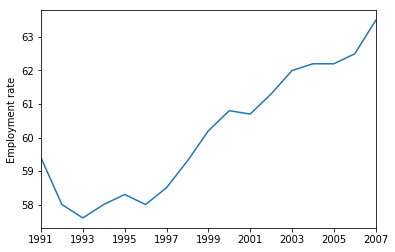

In [59]:
employment_ca.plot()
plt.ylabel('Employment rate')

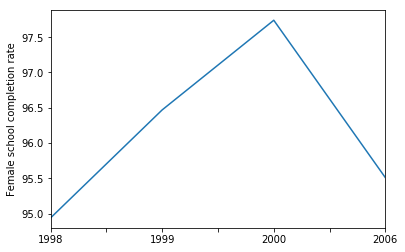

In [60]:
female_completion_ca.plot()
plt.ylabel('Female school completion rate')


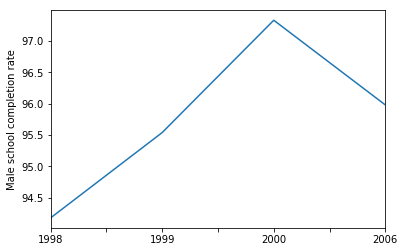

In [61]:
male_completion_ca.plot()
plt.ylabel('Male school completion rate')

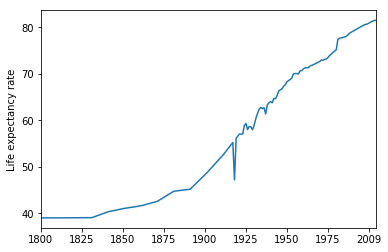

In [56]:
life_expectancy_ca.plot()
plt.ylabel('Life expectancy rate')

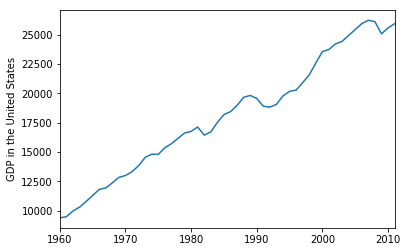

In [55]:
gdp_ca.plot()
plt.ylabel('GDP in the United States')

### GDP and Life Expectancy

In [ ]:
# Import Data
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [ ]:
# Life expectancy summary statistics 
print "Mean life expectancy:", life_expectancy.mean()
print "Standard deviation of the mean life expectancy:", round(life_expectancy.std(),2)
print "Max life expectancy:", round(life_expectancy.max(),2)
print "Sum life expectancy:", round(life_expectancy.sum(),2)
print

# GDP summary statistics 
print "Mean GDP:", round(gdp.mean(),2)
print "Standard deviation of the mean GDP:", round(gdp.std(),2)
print "Max GDP:", round(gdp.max(),2)
print "Sum GDP:", round(gdp.sum(),2)

Looking for the coorelation between two panda series where:
* variable1 : The number of countries where both values are above or both are below the mean 
* variable2 : The number of countries where one value is above and one is below the mean 


In [ ]:
def variable_correlation(variable1, variable2):
    '''
    Returns number of data points for when directions of variable1 
    and variable2 relative to the mean are the same or different. Direction 
    here means whether each value is above or below its mean.
    '''
    # Data points in the same/different direction as boolean 
    both_above = (variable1 > variable1.mean()) & (variable2 > variable2.mean())
    both_below = (variable1 < variable1.mean()) & (variable2 < variable2.mean())
    
    # If value is equal to the mean 
    is_same_direction = both_above | both_below 
    # Add up array of booleans to count number of Trues 
    num_same_direction = is_same_direction.sum() 
    
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

# Correlation between life expectancy and GDP
variable_correlation(life_expectancy, gdp)

#### Positive correlation between GDP and Life Expectancy 
For our sample set, 17 pairs of data points are going in the same direction, and 3 pairs of data are going in the opposite direction. Since the first number is large and the second number is small, there is a positive correlation. If one number is large whereas the other number was small, then there would be a negative coorelation. If the two numbers were equal, then there would be no correlation.